In [1]:
from egeaML import *
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import scale 
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
reader = DataIngestion(df='MLBook/data/data_intro.csv', col_target='male') 
data = reader.load_data() 
X = reader.features() 
y = reader.target()


In [5]:
X

,height,weight
0,63.2,168.7
1,68.7,169.8
2,64.8,176.6
3,67.9,246.8
4,68.9,151.6
...,...,...
65,60.6,140.2
66,70.4,141.6
67,66.4,144.4
68,62.3,116.2


In [6]:
y

0     0
1     0
2     0
3     0
4     1
     ..
65    0
66    1
67    0
68    0
69    1
Name: male, Length: 70, dtype: int64

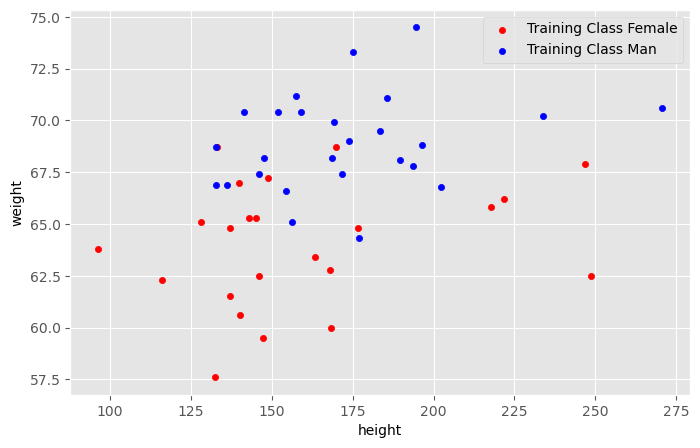

In [7]:
classification_plots.training_class(X,y,test_size=0.3)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn.predict(X_test)
score = knn.score(X_test,y_test)
print("accuracy: {:.4f}".format(score))

accuracy: 0.8571


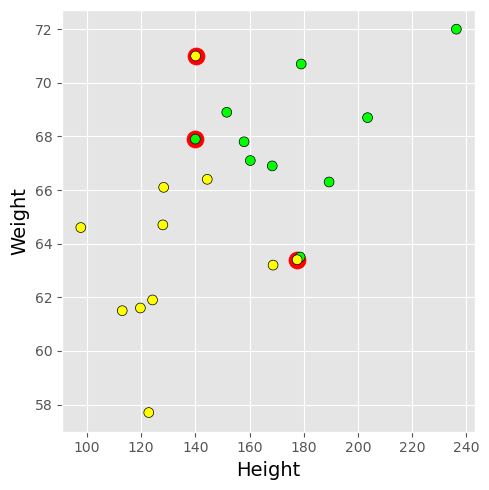

In [23]:
classification_plots.plotting_prediction(X_train, X_test, y_train, y_test, nn=1)

In [25]:
pkl_filename = "firstMLmodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn,file)

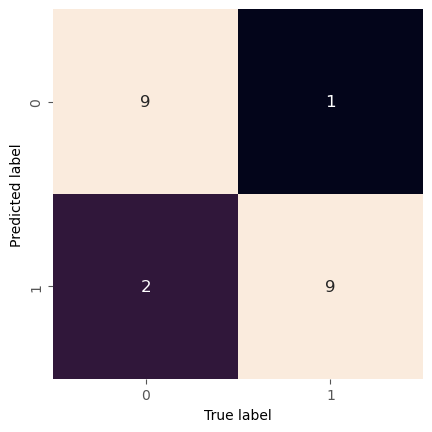

In [26]:
classification_plots.confusion_matrix(y_test,y_pred)

In [27]:
y_test

22    0
0     0
49    1
4     1
54    0
18    0
10    1
33    1
45    0
12    1
31    1
9     0
67    0
5     1
62    0
30    1
58    1
35    0
57    0
47    1
16    0
Name: male, dtype: int64

In [28]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [39]:
n_neigh = list(range(1,10))
train_scores = [] 
test_scores = []

for i in n_neigh: 
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train) 
    train_scores.append(train_score) 
    test_score = knn.score(X_test,y_test) 
    test_scores.append(test_score) 

df = pd.DataFrame() 
df['n_neigh']= n_neigh 
df['Training Score']=train_scores 
df['Test Score']=test_scores
df

,n_neigh,Training Score,Test Score
0,1,1.000000,0.857143
1,2,0.795918,0.761905
2,3,0.836735,0.761905
3,4,0.816327,0.857143
4,5,0.795918,0.809524
5,6,0.775510,0.857143
6,7,0.775510,0.857143
7,8,0.775510,0.857143
8,9,0.734694,0.857143


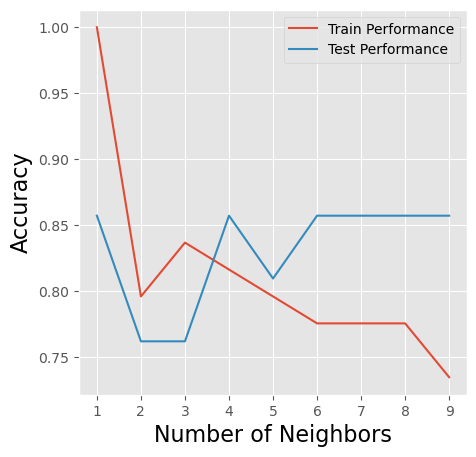

In [40]:
plt.figure(figsize=(5,5)) 
plt.plot(df.iloc[:,0], df.iloc[:,1], label ='Train Performance') 
plt.plot(df.iloc[:,0], df.iloc[:,2], label ='Test Performance') 
plt.xlabel('Number of Neighbors', fontsize=16) 
plt.ylabel('Accuracy', fontsize=16) 
plt.legend() 
plt.show()


## Tuning and Cross Validation

In [44]:
data_ = DataIngestion(df='MLBook/data/breast_cancer_data.csv', col_to_drop=None, col_target='diagnosis')

In [45]:
data_

<egeaML.DataIngestion object at 0x1cf138d90>

In [46]:
X=data_.features()
y=data_.target().apply(lambda x: 1 if x=='M' else 0)

In [47]:
X=scale(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

array([[-0.23618398, -0.10999635, -0.32105347, ..., -0.82857392,
        -0.89100191, -0.76506065],
       [-0.23621971, -0.2150816 , -0.67476767, ..., -0.37801891,
        -1.37957166, -0.42480753],
       [-0.2358907 ,  0.15981713, -1.23559085, ..., -0.05795583,
        -0.11932056,  0.45076239],
       ...,
       [-0.17181166,  0.04621146, -0.57470379, ..., -1.23756033,
        -0.71628161, -1.26047806],
       [-0.23587529, -0.04183295,  0.07687501, ...,  1.03683652,
         0.45013821,  1.19444266],
       [-0.23623974, -0.5530585 ,  0.28631105, ..., -0.61357437,
        -0.33448538, -0.84042616]])

In [50]:
X_train_,X_val,y_train_,y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=42)

In [51]:
knn = KNeighborsClassifier(n_neighbors=5).fit( X_train_,y_train_)

In [52]:
knn

KNeighborsClassifier()

In [54]:
print("Validation Score: {:.4f}".format(knn.score( X_val,y_val)))
print("Test Score: {:.4f}".format(knn.score( X_test,y_test)))


Validation Score: 0.9333
Test Score: 0.9649


In [56]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
cross_val_scores = [] 
neighbors = np.arange(1,15,2) 
for i in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=i) 
    scores = cross_val_score(knn,X_train,y_train,cv=5) 
    cross_val_scores.append(np.mean(scores)) 

print("Best CV Score: {:.4f}".format(np.max(cross_val_scores)))
best_nn = neighbors[np.argmax(cross_val_scores)]
print("Best n_neighbors: {}".format(best_nn))

Best CV Score: 0.9622
Best n_neighbors: 9


In [57]:
from sklearn.model_selection import GridSearchCV 
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.3,random_state=42) 
param_grid = {'n_neighbors': np.arange(1,15,2)} 
clf = KNeighborsClassifier() 
grid = GridSearchCV(clf, param_grid=param_grid, cv=10) 
grid.fit(X_train,y_train) 
print("Best Mean CV Score: {:.4f}".format( grid.best_score_)) 
print("Best Params: {}".format(grid.best_params_)) 
print("Test-set Score: {:.4f}".format(grid.score(X_test, y_test)))

Best Mean CV Score: 0.9671
Best Params: {'n_neighbors': 7}
Test-set Score: 0.9649


In [58]:
results = pd.DataFrame(grid.cv_results_) 
print(results.columns) 
print(results.params)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')
0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object
